In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Function to calculate derivatives
# For your equation y'' - 2y' = 2e^e, assume y' = z
# Then, we have the system:
# y' = z
# z' = 2e^e + 2z


import numpy as np

def validate_input(f1, f2, y_analytical, x0, y0, z0, t_end, h):
    try:
        # Перевірка, чи f1 і f2 є callable (функціями)
        if not callable(f1) or not callable(f2):
            raise ValueError("f1 і f2 мають бути функціями.")

        # Перевірка типів початкових значень
        if not isinstance(x0, (int, float)) or not isinstance(y0, (int, float)) or not isinstance(z0, (int, float)):
            raise ValueError("x0, y0 і z0 мають бути числами.")

        # Перевірка типу t_end і h
        if not isinstance(t_end, (int, float)) or not isinstance(h, (int, float)):
            raise ValueError("t_end і h мають бути числами.")

        # Перевірка діапазонів t_end і x0
        if t_end <= x0:
            raise ValueError("t_end має бути більшим за x0.")

        # Перевірка, чи h додатній і не перевищує (t_end - x0)
        if h <= 0 or h > (t_end - x0):
            raise ValueError("Крок h має бути додатнім і меншим або рівним t_end - x0.")

        # Перевірка аналітичної функції
        if not callable(y_analytical):
            raise ValueError("y_analytical має бути функцією.")

        # Тестовий виклик функцій
        try:
            f1_result = f1(x0, y0, z0)
            f2_result = f2(x0, y0, z0)
            y_analytical_result = y_analytical(x0)
        except Exception as e:
            raise ValueError(f"Помилка під час виклику функцій: {e}")

        # Перевірка, чи результати функцій числові
        if not isinstance(f1_result, (int, float)):
            raise ValueError("f1 має повертати числове значення.")
        if not isinstance(f2_result, (int, float)):
            raise ValueError("f2 має повертати числове значення.")
        if not isinstance(y_analytical_result, (int, float)):
            raise ValueError("y_analytical має повертати числове значення.")

        print("Усі вхідні дані коректні.")
        return True

    except ValueError as e:
        print(f"Помилка вхідних даних: {e}")
        return False




In [ ]:
def f1(x, y, z):
    return z

def f2(x, y, z):
    return x**2 - x + 2 - y

# Analytical solution for comparison
def y_analytical(x):
    result = (x-1) * x + np.sin(x) + np.cos(x)
    return result

x0 = 0
y0 = 1
z0 = 0
t_end = 1
h = 0.1


# Виклик перевірки
validate_input(f1, f2, y_analytical, x0, y0, z0, t_end, h)

Усі вхідні дані коректні.


True

Основна частина

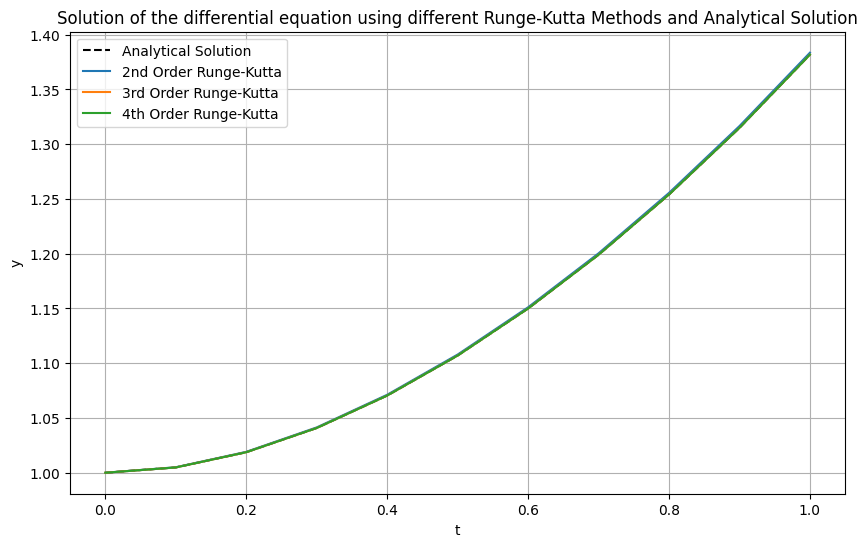

Error for the 2nd Order Runge-Kutta: 0.003519546436234152
Error for the 3rd Order Runge-Kutta: 3.7709643942973794e-05
Error for the 4th Order Runge-Kutta: 1.5143067769622113e-06


In [ ]:
# Runge-Kutta methods for a system of ODEs
def runge_kutta_2nd_order(f1, f2, x0, y0, z0, h, x_end):
    n = int((x_end - x0) / h) + 1
    x = np.linspace(x0, x_end, n)
    y = np.zeros(n)
    z = np.zeros(n)

    y[0] = y0
    z[0] = z0

    for i in range(1, n):
        k1y = h * f1(x[i-1], y[i-1], z[i-1])
        k1z = h * f2(x[i-1], y[i-1], z[i-1])

        k2y = h * f1(x[i-1] + h, y[i-1] + k1y, z[i-1] + k1z)
        k2z = h * f2(x[i-1] + h, y[i-1] + k1y, z[i-1] + k1z)

        y[i] = y[i-1] + (k1y + k2y) / 2
        z[i] = z[i-1] + (k1z + k2z) / 2

    return x, y

def runge_kutta_3rd_order(f1, f2, x0, y0, z0, h, x_end):
    n = int((x_end - x0) / h) + 1
    x = np.linspace(x0, x_end, n)
    y = np.zeros(n)
    z = np.zeros(n)

    y[0] = y0
    z[0] = z0

    for i in range(1, n):
        k1y = h * f1(x[i-1], y[i-1], z[i-1])
        k1z = h * f2(x[i-1], y[i-1], z[i-1])

        k2y = h * f1(x[i-1] + h/2, y[i-1] + k1y/2, z[i-1] + k1z/2)
        k2z = h * f2(x[i-1] + h/2, y[i-1] + k1y/2, z[i-1] + k1z/2)

        k3y = h * f1(x[i-1] + h, y[i-1] - k1y + 2 * k2y, z[i-1] - k1z + 2 * k2z)
        k3z = h * f2(x[i-1] + h, y[i-1] - k1y + 2 * k2y, z[i-1] - k1z + 2 * k2z)

        y[i] = y[i-1] + (k1y + 4 * k2y + k3y) / 6
        z[i] = z[i-1] + (k1z + 4 * k2z + k3z) / 6

    return x, y

def runge_kutta_4th_order(f1, f2, x0, y0, z0, h, x_end):
    n = int((x_end - x0) / h) + 1
    x = np.linspace(x0, x_end, n)
    y = np.zeros(n)
    z = np.zeros(n)

    y[0] = y0
    z[0] = z0

    for i in range(1, n):
        k1y = h * f1(x[i-1], y[i-1], z[i-1])
        k1z = h * f2(x[i-1], y[i-1], z[i-1])

        k2y = h * f1(x[i-1] + h/2, y[i-1] + k1y/2, z[i-1] + k1z/2)
        k2z = h * f2(x[i-1] + h/2, y[i-1] + k1y/2, z[i-1] + k1z/2)

        k3y = h * f1(x[i-1] + h/2, y[i-1] + k2y/2, z[i-1] + k2z/2)
        k3z = h * f2(x[i-1] + h/2, y[i-1] + k2y/2, z[i-1] + k2z/2)

        k4y = h * f1(x[i-1] + h, y[i-1] + k3y, z[i-1] + k3z)
        k4z = h * f2(x[i-1] + h, y[i-1] + k3y, z[i-1] + k3z)

        y[i] = y[i-1] + (k1y + 2*k2y + 2*k3y + k4y) / 6
        z[i] = z[i-1] + (k1z + 2*k2z + 2*k3z + k4z) / 6

    return x, y


# Compute numerical and analytical solutions using different methods
methods = [runge_kutta_2nd_order, runge_kutta_3rd_order, runge_kutta_4th_order]
method_names = ['2nd Order Runge-Kutta', '3rd Order Runge-Kutta', '4th Order Runge-Kutta']
y_values_analytical = [y_analytical(t) for t in np.linspace(x0, t_end, int((t_end - x0) / h) + 1)]

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(x0, t_end, int((t_end - x0) / h) + 1), y_values_analytical, 'k--', label="Analytical Solution")

for method, name in zip(methods, method_names):
    x_values, y_values = method(f1, f2, x0, y0, z0, h, t_end)
    plt.plot(x_values, y_values, label=name)

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.title("Solution of the differential equation using different Runge-Kutta Methods and Analytical Solution")
plt.show()

# Calculate and output the error for each method
for method, name in zip(methods, method_names):
    x_values, y_values = method(f1, f2, x0, y0, z0, h, t_end)
    errors = np.abs(y_values - np.array(y_values_analytical))
    error_norm = np.linalg.norm(errors)
    print(f"Error for the {name}: {error_norm}")

In [ ]:
def format_input(data):
    """Форматує вхідні дані для компактного відображення."""
    formatted = []
    for value in data:
        if callable(value):
            formatted.append(value.__name__)  # Ім'я функції
        else:
            formatted.append(repr(value))  # Представлення інших значень
    return ", ".join(formatted)

def run_tests():
    test_cases = [
        # 1. f1 і f2 не є функціями
        {
            "input": [None, f2, y_analytical, x0, y0, z0, t_end, h],
            "expected_error": "f1 і f2 мають бути функціями."
        },
        {
            "input": [f1, None, y_analytical, x0, y0, z0, t_end, h],
            "expected_error": "f1 і f2 мають бути функціями."
        },
        # 2. x0, y0, z0 не є числами
        {
            "input": [f1, f2, y_analytical, "0", y0, z0, t_end, h],
            "expected_error": "x0, y0 і z0 мають бути числами."
        },
        {
            "input": [f1, f2, y_analytical, x0, "1", z0, t_end, h],
            "expected_error": "x0, y0 і z0 мають бути числами."
        },
        {
            "input": [f1, f2, y_analytical, x0, y0, "z", t_end, h],
            "expected_error": "x0, y0 і z0 мають бути числами."
        },
        # 3. t_end і h не є числами
        {
            "input": [f1, f2, y_analytical, x0, y0, z0, "1", h],
            "expected_error": "t_end і h мають бути числами."
        },
        {
            "input": [f1, f2, y_analytical, x0, y0, z0, t_end, "0.1"],
            "expected_error": "t_end і h мають бути числами."
        },
        # 4. t_end <= x0
        {
            "input": [f1, f2, y_analytical, x0, y0, z0, -1, h],
            "expected_error": "t_end має бути більшим за x0."
        },
        # 5. h <= 0 або h > (t_end - x0)
        {
            "input": [f1, f2, y_analytical, x0, y0, z0, t_end, 0],
            "expected_error": "Крок h має бути додатнім і меншим або рівним t_end - x0."
        },
        {
            "input": [f1, f2, y_analytical, x0, y0, z0, t_end, 2],
            "expected_error": "Крок h має бути додатнім і меншим або рівним t_end - x0."
        },
        # 6. y_analytical не є функцією
        {
            "input": [f1, f2, None, x0, y0, z0, t_end, h],
            "expected_error": "y_analytical має бути функцією."
        },
        # 7. Помилки виклику функцій
        {
            "input": [f1, f2, lambda x: x / 0, x0, y0, z0, t_end, h],
            "expected_error": "Помилка під час виклику функцій"
        },
        # 8. f1 або f2 повертають нечислове значення
        {
            "input": [lambda x, y, z: "not a number", f2, y_analytical, x0, y0, z0, t_end, h],
            "expected_error": "f1 має повертати числове значення."
        },
        {
            "input": [f1, lambda x, y, z: None, y_analytical, x0, y0, z0, t_end, h],
            "expected_error": "f2 має повертати числове значення."
        },
        # 9. y_analytical повертає нечислове значення
        {
            "input": [f1, f2, lambda x: "not a number", x0, y0, z0, t_end, h],
            "expected_error": "y_analytical має повертати числове значення."
        }
    ]

    for i, test_case in enumerate(test_cases, 1):
        print("\n" + "=" * 50)
        print(f"Тест {i}")
        print(f"Вхідні дані: {format_input(test_case['input'])}")
        print("-" * 50)
        try:
            result = validate_input(*test_case["input"])
            if result:
                print(f"Результат: Тест провалено. Очікувалась помилка: '{test_case['expected_error']}', але помилок не було.")
        except ValueError as e:
            error_message = str(e)
            print(f"Результат: {error_message}")
            if test_case["expected_error"] in error_message:
                print(f"Тест успішний.")
            else:
                print(f"Тест провалено. Очікувалась помилка: '{test_case['expected_error']}', але отримано: '{error_message}'.")
        print("=" * 50)

run_tests()



Тест 1
Вхідні дані: None, f2, y_analytical, 0, 1, 0, 1, 0.1
--------------------------------------------------
Помилка вхідних даних: f1 і f2 мають бути функціями.

Тест 2
Вхідні дані: f1, None, y_analytical, 0, 1, 0, 1, 0.1
--------------------------------------------------
Помилка вхідних даних: f1 і f2 мають бути функціями.

Тест 3
Вхідні дані: f1, f2, y_analytical, '0', 1, 0, 1, 0.1
--------------------------------------------------
Помилка вхідних даних: x0, y0 і z0 мають бути числами.

Тест 4
Вхідні дані: f1, f2, y_analytical, 0, '1', 0, 1, 0.1
--------------------------------------------------
Помилка вхідних даних: x0, y0 і z0 мають бути числами.

Тест 5
Вхідні дані: f1, f2, y_analytical, 0, 1, 'z', 1, 0.1
--------------------------------------------------
Помилка вхідних даних: x0, y0 і z0 мають бути числами.

Тест 6
Вхідні дані: f1, f2, y_analytical, 0, 1, 0, '1', 0.1
--------------------------------------------------
Помилка вхідних даних: t_end і h мають бути числами.

Тес